In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

/home/latruite/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [225]:
path = "/media/latruite/DATA/Data/studycase/"
csvfile = "cleaned_UCI_Credit_Card.csv"

In [226]:
data = pd.read_csv(path + csvfile)
n = len(data)

In [227]:
"""
    ID: ID of each client
    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    SEX: Gender (1=male, 2=female)
    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    MARRIAGE: Marital status (1=married, 2=single, 3=others)
    AGE: Age in years
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
    PAY_2: Repayment status in August, 2005 (scale same as above)
    PAY_3: Repayment status in July, 2005 (scale same as above)
    PAY_4: Repayment status in June, 2005 (scale same as above)
    PAY_5: Repayment status in May, 2005 (scale same as above)
    PAY_6: Repayment status in April, 2005 (scale same as above)
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    default.payment.next.month: Default payment (1=yes, 0=no)
"""

# Data visualization

In [228]:
def proportiontest (pa, pb, na, nb):
    pc = (na*pa + nb*pb) / (na + nb)
    z = abs((pa - pb) / (pc*(1-pc)*(1./na + 1./nb))**0.5)
    if z > 1.96:
        return str(z) + " > 1.96 :  Significative at 95% level"
    else:
        return str(z) + " < 1.96 :  Non significative at 95% level"

## Looking at variable sex

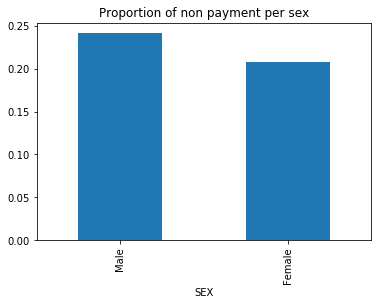

In [229]:
data.groupby("SEX")["default.payment.next.month"].mean().plot(kind="bar")
plt.title("Proportion of non payment per sex")
plt.xticks([0, 1], ["Male", "Female"])
plt.show()

In [230]:
dat = data.groupby("SEX")["default.payment.next.month"].mean()
print("Test of the difference of proportions of non payment between the two sexes")
print( proportiontest(dat[1], dat[2], len(data[data.SEX == 1]), len(data[data.SEX == 2])) )

Test of the difference of proportions of non payment between the two sexes
6.92137508856 > 1.96 :  Significative at 95% level


We observe that men are more likely to fail pay

In [ ]:
data.SEX = data.SEX.replace(1, 0).replace(2,1)

## Education

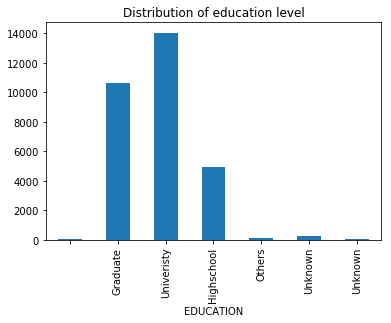

In [231]:
data.groupby("EDUCATION")["default.payment.next.month"].count().plot(kind="bar")
plt.xticks([0, 1 ,2 ,3 ,4 ,5 ,6], ["", "Graduate", "Univeristy", "Highschool", "Others", "Unknown", "Unknown"])
plt.title("Distribution of education level")
plt.show()

In [232]:
len(data[data.EDUCATION.isin([0, 4, 5 ,6])])*1./n

0.0156

We observe that people Whom we do not know the level of education represent 1.5% of the population

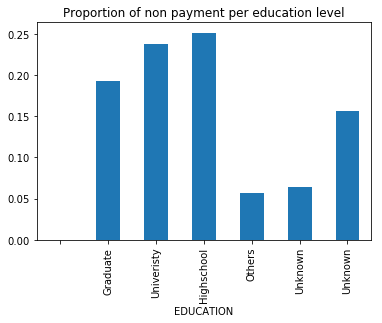

In [233]:
data.groupby("EDUCATION")["default.payment.next.month"].mean().plot(kind="bar")
plt.xticks([0, 1 ,2 ,3 ,4 ,5 ,6], ["", "Graduate", "Univeristy", "Highschool", "Others", "Unknown", "Unknown"])
plt.title("Proportion of non payment per education level")
plt.show()

In [234]:
dat = data.groupby("EDUCATION")["default.payment.next.month"].mean()
print("Tests of proportion of non payment between different education levels")
print( proportiontest(dat[1], dat[2], len(data[data.EDUCATION == 1]), len(data[data.EDUCATION == 2])) )
print( proportiontest(dat[2], dat[3], len(data[data.EDUCATION == 2]), len(data[data.EDUCATION == 3])) )

Tests of proportion of non payment between different education levels
8.46575594987 > 1.96 :  Significative at 95% level
2.0071814886 > 1.96 :  Significative at 95% level


Moreover, we observe a certain correlation (negative) of the non payment proportion with the level of education and we decide therefore to drop observations whose this variable is unknown

In [235]:
data = data[data.EDUCATION.isin([1, 2, 3])]

## Mariage

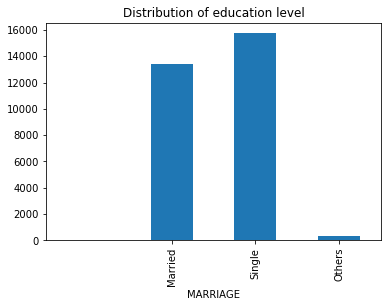

In [236]:
data.groupby("MARRIAGE")["default.payment.next.month"].count().plot(kind="bar")
plt.xticks([1, 2 ,3], ["Married", "Single", "Others"])
plt.title("Distribution of education level")
plt.show()

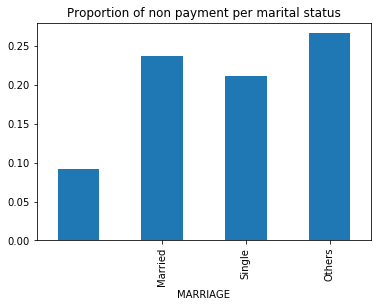

In [237]:
data.groupby("MARRIAGE")["default.payment.next.month"].mean().plot(kind="bar")
plt.title("Proportion of non payment per marital status")
plt.xticks([1, 2 ,3], ["Married", "Single", "Others"])
plt.show()

In [238]:
dat = data.groupby("MARRIAGE")["default.payment.next.month"].mean()
print("Test of difference of proportions of non payment between the two types of marital status")
print( proportiontest(dat[1], dat[2], len(data[data.MARRIAGE == 1]), len(data[data.MARRIAGE == 2])) )

Test of difference of proportions of non payment between the two types of marital status
5.36854633982 > 1.96 :  Significative at 95% level


same as previously..

In [239]:
data = data[data.MARRIAGE.isin([1, 2])]
n = len(data)
data.index = range(n)

## Age

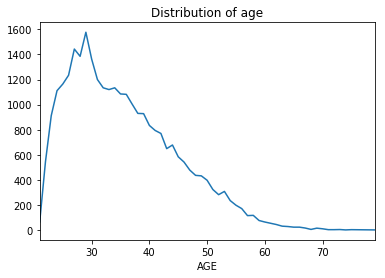

In [240]:
data.groupby("AGE")["default.payment.next.month"].count().plot()
plt.title("Distribution of age")
plt.show()

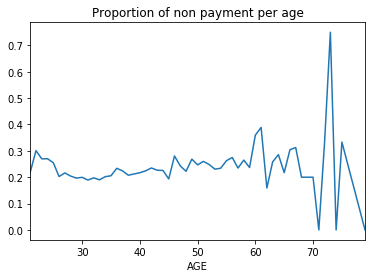

In [241]:
data.groupby("AGE")["default.payment.next.month"].mean().plot()
plt.title("Proportion of non payment per age")
plt.show()

let cut age in 4 parts (30, 40, 50)

In [242]:
data[data.AGE.between(30,40)]["default.payment.next.month"].mean()

0.20626322471434616

In [243]:
PA = data[data.AGE < 30]["default.payment.next.month"].mean()
PB = data[data.AGE.between(30, 39, inclusive = True)]["default.payment.next.month"].mean()
PC = data[data.AGE.between(40, 49, inclusive = True)]["default.payment.next.month"].mean()
PD = data[data.AGE >= 50]["default.payment.next.month"].mean()
NA = len(data[data.AGE < 30])
NB = len(data[data.AGE.between(30, 39, inclusive = True)])
NC = len(data.AGE.between(40, 49, inclusive = True))
ND = len(data[data.AGE >= 50])
print ("PA = " + str(PA) + " ; PB = " + str(PB) + " ; PC = " + str(PC) + " ; PD = " + str(PD))

PA = 0.230630630631 ; PB = 0.205445769966 ; PC = 0.231402291431 ; PD = 0.254117647059


In [244]:
print(proportiontest(PC, PD, NC, ND))
print(proportiontest(PC, PA, NC, NA))
print(proportiontest(PB, PA, NB, NA))

2.60113611425 > 1.96 :  Significative at 95% level
0.154533098744 < 1.96 :  Non significative at 95% level
4.35185250571 > 1.96 :  Significative at 95% level


We can divde age in 3 groups ([20, 29] U [40, 49] ; [30,39] ; [50,++])

In [245]:
groupA = [0]*n
groupB = [0]*n
for i in range(n):
    age = data.AGE[i]
    if age < 30 or (age >= 40 and age < 50):
        groupA[i] = 1
    elif age >= 30 and age < 40:
        groupB[i] = 1
data["AGEA"] = groupA
data["AGEB"] = groupB

## PAY_ ...

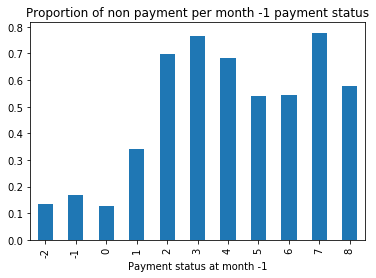

In [246]:
data.groupby("PAY_0")["default.payment.next.month"].mean().plot(kind = "bar")
plt.title("Proportion of non payment per month -1 payment status")
plt.xlabel("Payment status at month -1")
plt.show()

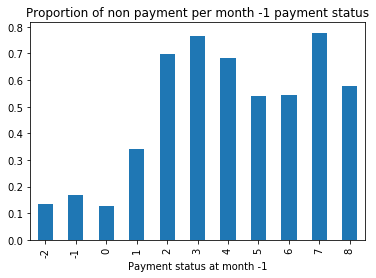

In [261]:
data.groupby("PAY_0")["default.payment.next.month"].mean().plot(kind = "bar")
plt.title("Proportion of non payment per month -1 payment status")
plt.xlabel("Payment status at month -1")
plt.show()

we observe the same for pay 1 2 ... => divide in 3 parts (<= 0 ; 1 ; >= 2)

In [248]:
data[["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]].corr()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
PAY_0,1.000000,0.672171,0.574688,0.539288,0.509766,0.475009
PAY_2,0.672171,1.000000,0.766798,0.662358,0.622381,0.575597
PAY_3,0.574688,0.766798,1.000000,0.777441,0.686602,0.633524
PAY_4,0.539288,0.662358,0.777441,1.000000,0.820059,0.717384
PAY_5,0.509766,0.622381,0.686602,0.820059,1.000000,0.817649
PAY_6,0.475009,0.575597,0.633524,0.717384,0.817649,1.000000


strong colinearity among previous payment status

In [249]:
data[["default.payment.next.month", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]].corr()["default.payment.next.month"]

default.payment.next.month    1.000000
PAY_0                         0.327230
PAY_2                         0.263981
PAY_3                         0.234362
PAY_4                         0.214627
PAY_5                         0.203990
PAY_6                         0.187013
Name: default.payment.next.month, dtype: float64

we retain the most correlated with default payment (PAY_0)

In [250]:
groupA = [0]*n
groupB = [0]*n
for i in range(n):
    pay0 = data.PAY_0[i]
    if pay0 == 1:
        groupA[i] = 1
    elif pay0 >= 2:
        groupB[i] = 1
data["PAY0A"] = groupA
data["PAY0B"] = groupB

## Bill et Pay amounts

In [260]:
paylist = ["PAY_AMT"+str(i+1) for i in range(6)]
billlist = ["BILL_AMT"+str(i+1) for i in range(6)]
data[["default.payment.next.month"] + paylist + billlist].corr()["default.payment.next.month"]

default.payment.next.month    1.000000
PAY_AMT1                     -0.076875
PAY_AMT2                     -0.060498
PAY_AMT3                     -0.057326
PAY_AMT4                     -0.057570
PAY_AMT5                     -0.055789
PAY_AMT6                     -0.054372
BILL_AMT1                    -0.019072
BILL_AMT2                    -0.013648
BILL_AMT3                    -0.013589
BILL_AMT4                    -0.009542
BILL_AMT5                    -0.006150
BILL_AMT6                    -0.004862
Name: default.payment.next.month, dtype: float64

these variables do not seem to be much more correlated with next month default payment so we won't use them for now

## Credit amount

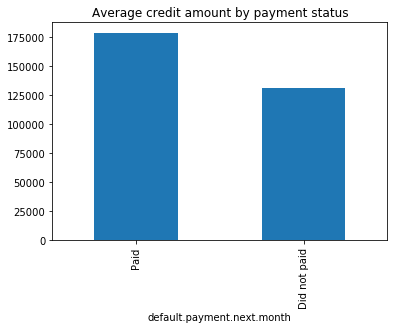

In [335]:
data.groupby("default.payment.next.month").mean()["LIMIT_BAL"].plot(kind = "bar")
plt.title("Average credit amount by payment status")
plt.xticks([0, 1], ["Paid", "Did not paid"])
plt.show()

we observe a significative difference, let see how payment proportion is distributed among credit amounts

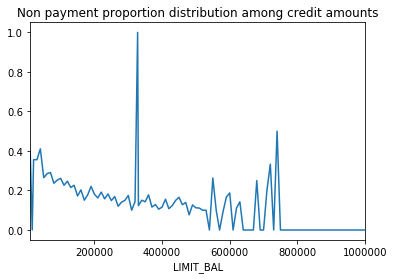

In [341]:
data.groupby("LIMIT_BAL").mean()["default.payment.next.month"].plot()
plt.title("Non payment proportion distribution among credit amounts")
plt.show()

non payment propensity seems to be negatively correlated with credit amount, indeed we observe a slight correlation coefficient :

In [344]:
data[["default.payment.next.month", "LIMIT_BAL"]].corr()

,default.payment.next.month,LIMIT_BAL
default.payment.next.month,1.000000,-0.153576
LIMIT_BAL,-0.153576,1.000000


let now see how credit amounts are distributed

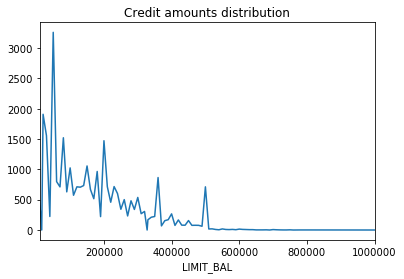

In [350]:
data.groupby("LIMIT_BAL").count()["default.payment.next.month"].plot()
plt.title("Credit amounts distribution")
plt.show()

let devide it in 3 parts (200k, 400k)

In [348]:
PA = data[data.LIMIT_BAL < 200000]["default.payment.next.month"].mean()
PB = data[data.LIMIT_BAL.between(200000, 399999, inclusive=True)]["default.payment.next.month"].mean()
PC = data[data.LIMIT_BAL >= 400000]["default.payment.next.month"].mean()
NA = len(data[data.LIMIT_BAL < 200000])
NB = len(data[data.LIMIT_BAL.between(200000, 399999, inclusive=True)])
NC = len(data[data.LIMIT_BAL >= 400000])

In [349]:
print ("PA = " + str(PA) + " ; PB = " + str(PB) + " ; PC = " + str(PC))

PA = 0.26494089317 ; PB = 0.161242937853 ; PC = 0.120529152376


In [352]:
print(proportiontest(PA, PB, NA, NB))
print(proportiontest(PB, PC, NB, NC))

18.9948797766 > 1.96 :  Significative at 95% level
4.59835163212 > 1.96 :  Significative at 95% level


it does seems relevant to divide the dataset in 3 part considering this variable

In [353]:
groupA = [0]*n
groupB = [0]*n
for i in range(n):
    credit = data.LIMIT_BAL[i]
    if credit < 200000:
        groupA[i] = 1
    elif credit >= 200000 and credit < 400000:
        groupB[i] = 1
data["CREDITA"] = groupA
data["CREDITB"] = groupB

# Modeling

retained variables : SEX, EDUCATION, MARRIAGE, AGEA, AGEB, PAY0A, PAY0B, GREDITA, CREDITB

In [313]:
Y = data["default.payment.next.month"]

our first model

In [354]:
X = data[['SEX', 'EDUCATION', 'MARRIAGE', 'AGEA', 'AGEB', 'PAY0A', 'PAY0B', 'CREDITA', 'CREDITB']]
scores = cross_val_score(LogisticRegression(), X, Y, scoring='accuracy', cv=10)
print scores.mean()

0.818916152676


In [357]:
X = data[['PAY0A', 'PAY0B']]
scores = cross_val_score(LogisticRegression(), X, Y, scoring='accuracy', cv=10)
print scores.mean()

0.818916152676


we observe that we obtain the same score putting only payment status related variables 

let now try putting all previous payment status together

In [359]:
X = data[["PAY0A", "PAY0B", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]]
scores = cross_val_score(LogisticRegression(), X, Y, scoring='accuracy', cv=10)
print scores.mean()

0.819156184041


we obtain a better score, it should be interresting to try partitioning all previous month payment status the same way that PAY_0

indeed, as follows, dividing payment status in 3 parts gives better scores

In [360]:
X = data[["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]]
scores = cross_val_score(LogisticRegression(), X, Y, scoring='accuracy', cv=10)
print scores.mean()

0.807496799018
